In [1]:
import pandas as pd

roi_signals = pd.read_csv("out02_roi_signals_merge/roi_signals_6mm.txt", sep = ',')
subject_info = pd.read_csv("age_gender_edu.txt", sep = ',')
# subject_info2 = pd.read_csv("cc_scan_2_matching.csv", sep = ',')

data = subject_info.merge(roi_signals, left_on = 'cc_post_intake_id', right_on = 'subj')
# data.replace({'group': {'NTHC': 1, 'TEHC': 2}}, inplace = True)
data

,cc_post_intake_id,gender,age,yrs_of_edu,subj,group,roi,beta_value
0,1001,2,45,18,1001,NTHC,L_Fp,0.439684
1,1001,2,45,18,1001,NTHC,L_pMFG,NaN
2,1001,2,45,18,1001,NTHC,R_aMFG,NaN
3,1001,2,45,18,1001,NTHC,R_FEF,-0.423779
4,1001,2,45,18,1001,NTHC,R_Fp,NaN
...,...,...,...,...,...,...,...,...
654,2108,1,22,14,2108,TEHC,R_IFJ,2.027088
655,2108,1,22,14,2108,TEHC,R_IPL,0.391417
656,2108,1,22,14,2108,TEHC,R_M1,NaN
657,2108,1,22,14,2108,TEHC,R_pMFG,-0.020677


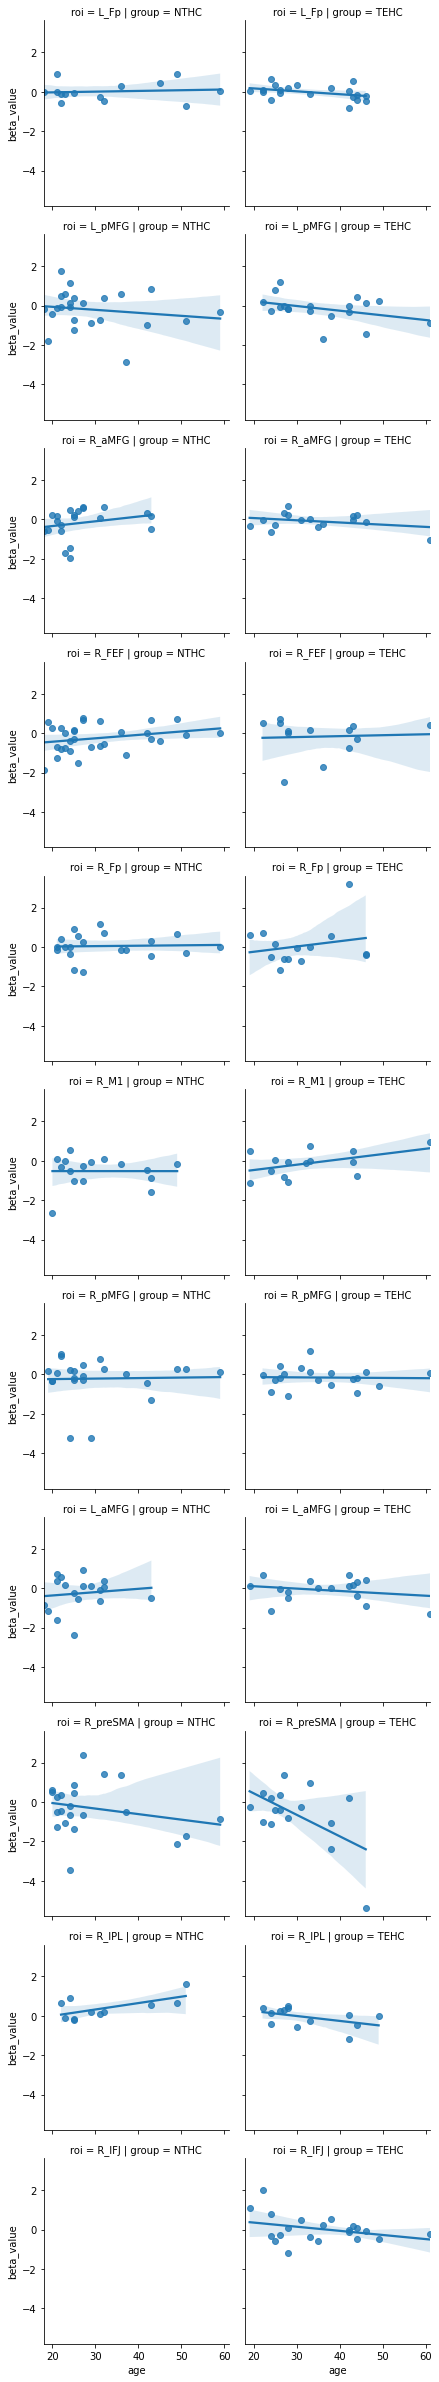

In [2]:
import seaborn as sns

sns.lmplot(
    data=data, x="age", y="beta_value", #hue = 'gender',
    col="group", row="roi", height=3,
)

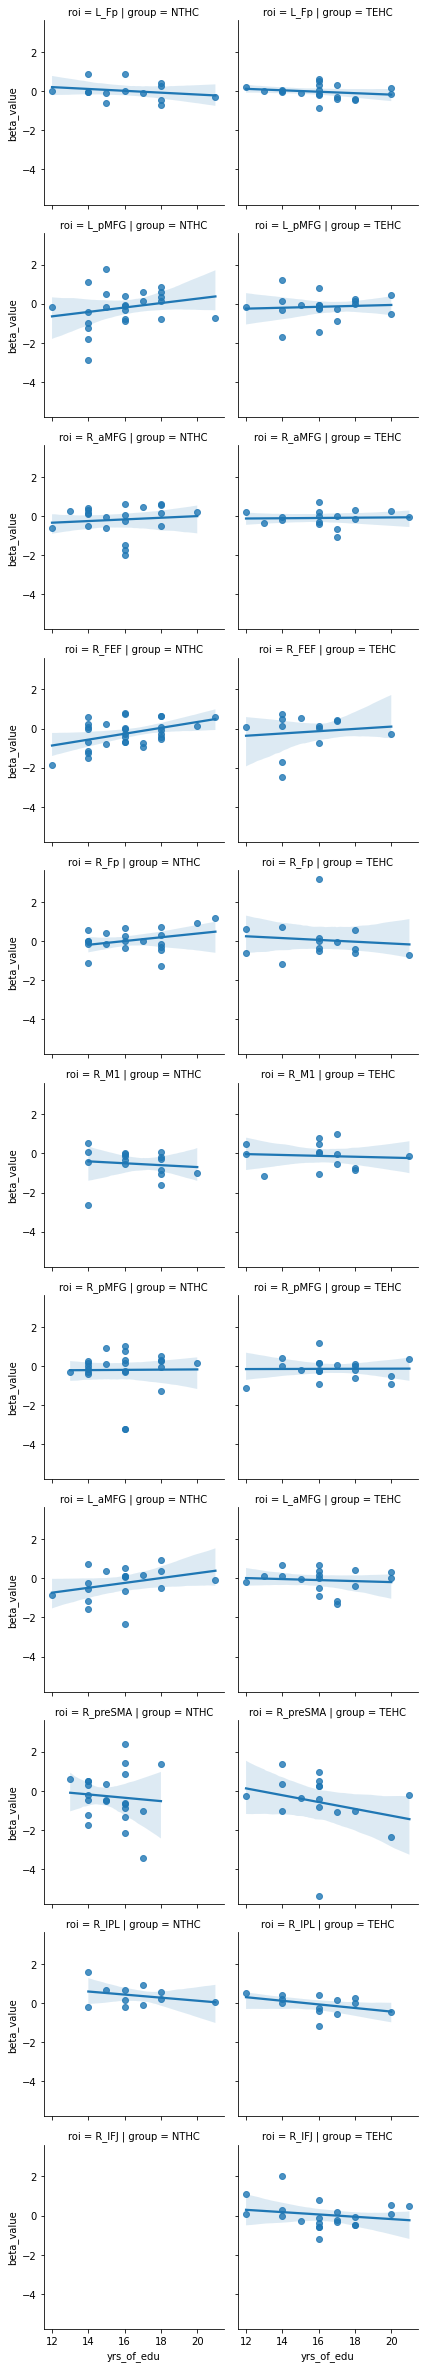

In [49]:
sns.lmplot(
    data=data, x="yrs_of_edu", y="beta_value", #hue = 'gender',
    col="group", row="roi", height=3,
)

In [44]:
import statsmodels.api as sm

roi_list = data.roi.unique()
group_list = data.group.unique()

for group in group_list:
    for roi in roi_list:
        print(group, roi)
        X = data.loc[(data['group']==group) & (data['roi'] == roi) & 
                     (~data['beta_value'].isna()), ['gender', 'age', 'yrs_of_edu']]
        y = data.loc[(data['group']==group) & (data['roi'] == roi) & 
                     (~data['beta_value'].isna()), ['beta_value']]
        if len(y) < 20: continue
        
        X = sm.add_constant(X) # adding a constant
 
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X) 

        print_model = model.summary()
        print(print_model)
        
        

NTHC L_Fp
NTHC L_pMFG
                            OLS Regression Results                            
Dep. Variable:             beta_value   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1.791
Date:                Wed, 30 Nov 2022   Prob (F-statistic):              0.181
Time:                        22:03:44   Log-Likelihood:                -30.178
No. Observations:                  24   AIC:                             68.36
Df Residuals:                      20   BIC:                             73.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4746      1.6